__AUTOR:__ Miguel Thomas

__CURSO:__ Aprendizaje de Maquina

__FECHA:__ 31 de marzo de 2024


In [1]:
import sys
# Version minima de sistema python 3.7
assert sys.version_info >= (3,7)
from packaging import version
import sklearn
# Especificacion de version minima de la libreria a manipulacion
assert version.parse(sklearn.__version__) >= version.parse ('1.0.1')

In [2]:
# Librerias
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate # Para mostrar las tablas en un formato

# 1. Analisis de variables

In [3]:
import urllib.request
from zlib import crc32
from pathlib import Path

In [4]:
def load_adult_dataset():
    # URL del archivo adult.data
    data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

    # Ruta del directorio y del archivo para los nombres de las columnas
    directory_path = Path('datasets')
    directory_path.mkdir(parents=True, exist_ok=True)  # Crear el directorio si no existe

    data_file_path = directory_path / 'adult.data'

    # Verificar si el archivo de datos ya existe
    if not data_file_path.is_file():
        # Si no existe, descargarlo desde la URL
        urllib.request.urlretrieve(data_url, data_file_path)

    # Definir los nombres de las columnas manualmente (La información se obtiene de la descripción del archivo de datos)
    column_names = [
        'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
        'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
        'hours_per_week', 'native_country', 'income'
    ]

    # Leer el archivo de datos utilizando pandas y asignar los nombres de las columnas
    return pd.read_csv(data_file_path, delimiter=', ', header=None, names=column_names)

# Llamamos a la función y guardamos el resultado en la variable 'adult_dataset'
dataset = load_adult_dataset()


C:\Users\thoma\AppData\Local\Temp\ipykernel_26012\4147070128.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(data_file_path, delimiter=', ', header=None, names=column_names)


1. Edad: La primera columna representa la edad de los individuos. Los valores son numéricos enteros.

2. Tipo de empleo: La segunda columna indica el tipo de empleador o el sector de empleo. Es una variable categórica que incluye categorías como "State-gov" (gobierno estatal), "Self-emp-not-inc" (autoempleado no incorporado), "Private" (privado), entre otras posibilidades.

3. Peso Final: La variable fnlwgt, o peso final, indica el número estimado de personas en la población total que cada entrada en el conjunto de datos representa

4. Nivel educativo: La cuarta columna muestra el nivel de educación más alto alcanzado por los individuos. Es una variable categórica que incluye categorías como "Bachelors" (licenciatura), "HS-grad" (graduado de secundaria), "11th" (onceavo grado), etc.

5. Años de educación: La quinta columna numérica representa la cantidad total de años de educación completados.

6. Estado civil: La sexta columna es una variable categórica que describe el estado civil de los individuos, con categorías como "Never-married" (nunca casado), "Married-civ-spouse" (casado con cónyuge civil), "Divorced" (divorciado), etc.

7. Ocupación: La séptima columna indica la ocupación o el tipo de trabajo que realiza el individuo. Es una variable categórica con categorías como "Adm-clerical" (administrativo/clerical), "Exec-managerial" (ejecutivo/gerencial), "Handlers-cleaners" (manejadores/limpiadores), entre otras.

8. Relación: La octava columna describe la relación del individuo con su familia o hogar, como "Not-in-family" (no en familia), "Husband" (esposo), "Wife" (esposa), etc.

9. Raza: La novena columna es una variable categórica que indica la raza del individuo, con categorías como "White" (blanco), "Black" (negro), etc.

10. Sexo: La décima columna indica el sexo del individuo, ya sea "Male" (masculino) o "Female" (femenino).

11. Ganancia de capital: La undécima columna numérica representa las ganancias de capital reportadas por el individuo.

12. Pérdida de capital: La duodécima columna numérica muestra las pérdidas de capital reportadas por el individuo.

13. Horas de trabajo por semana: La decimotercera columna numérica indica la cantidad de horas que el individuo trabaja por semana.

14. País de origen: La decimocuarta columna es una variable categórica que muestra el país de origen o residencia del individuo, con categorías como "United-States" (Estados Unidos), "Cuba", entre otros.

15. Ingresos: La decimoquinta y última columna categoriza a los individuos en dos grupos según sus ingresos: aquellos que ganan "<=50K" al año y aquellos que podrían ganar más.

La columna de ingresos es a demas la etiqueta (Variable objetivo)

## 1.1. Medidas de tendencia central de cada variable

In [5]:
dataset.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Analisis:

__Edad:__ La desviación estándar resulta ser un poco alta teniendo en cuenta la variable que estamos observando. Además, podemos notar que la edad mínima y máxima están algo alejadas de la media. Esto tiene sus pros y sus contras; por un lado, al contar con una amplia variedad puede ser beneficioso para evitar que el algoritmo aprenda sesgos. Sin embargo, esta variabilidad también puede ser indicativa de ruido en los datos. En situaciones como esta, lo más recomendable sería realizar una normalización de los datos para mitigar el ruido.

__Horas por semana (hours-per-week):__ Se observa una situación similar a la analizada con la variable edad. Pero esta variable es más crítica para predecir los ingresos que una persona puede generar, por lo que requiere una mayor atención. Además, al considera el valor minimo y maximo de esta variable, se nota una clara diferencia en los datos.

__Capital ganado (capital-gain) y Capital perdido (capital-loss):__ Ambas variables presentan una desviación estándar muy alta, lo que indica una gran variabilidad en los valores. Esto puede conducir a sesgos, ya sea por valores demasiado altos o demasiado bajos. Aunque la normalización de los datos puede ayudar, también podría introducir problemas durante el entrenamiento del modelo.

__Nota:__ Para tener mas certeza sobre el analisis anterior y la toma de decisiones se realizara un histograma que nos permita ver la distribucion de los datos.

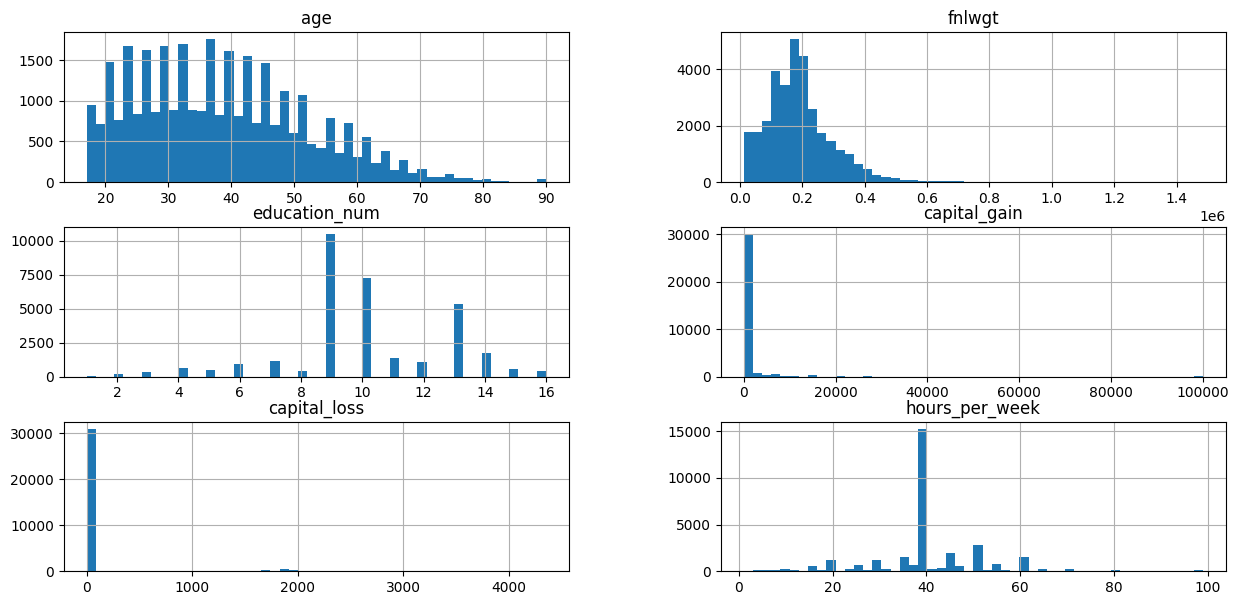

In [6]:
# Crear un histograma del DataFrame 'adult'
dataset.hist(bins=50, figsize=(15, 7))

plt.show()

__Analisis:__ 
Análisis:

1. Edad: La distribución de la edad presenta una buena variedad en los datos, lo que indica que el modelo no aprenderá sesgos durante el entrenamiento. Aunque las edades de 80 a 90 años se encuentran un poco alejadas de la mayoría, lo que podría considerarse valores atípicos, proporcionan información valiosa para el entrenamiento.

2. Capital_gain y Capital_loss: Se observa que estas dos variables tienen una marcada inclinación hacia la izquierda y tienden a un solo valor, indicando que la consideración de estas variables por parte del modelo probablemente no resultará en un cambio significativo en la predicción.

3. Horas por semana: Esta variable influye en el salario de manera notable. A pesar de la diversidad de datos, existen sesgos importantes; la mitad de los datos se concentran alrededor de la media, mientras que la otra mitad se distribuye en pequeñas proporciones a lo largo del rango.

4. Número de años de educación: Esta variable influye de manera notable. Existe una buena diversidad en los datos lo que implicara mejor entendimiento por parte del modelo.

5. Nota: Este es un analisis preliminar y solo se habla sobre como puede afectar cada variable individualmente.

# 2. Identificar errores, datos faltantes, datos duplicados y hacer la correccion y el tratamiento de los datos

In [7]:
dt_sin_errores = dataset.copy()

## 2.1. Valores faltantes

In [8]:
# Verificamos si hay valores faltantes en algun campo
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Verificamos si hay algun valor nulo en las columnas
dataset.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

__Observaciones:__ No existen ninguna valor faltante en el conjunto de datos por lo tanto no es necesario hacerle tratamiento a los datos

## 2.2. Datos duplicados

In [10]:
# Se revisan las filas duplicadas
duplicate_rows = dt_sin_errores[dt_sin_errores.duplicated()]
# Se eliminan 
dt_sin_errores = dt_sin_errores.drop_duplicates()
print("cantidad de filas duplicadas: ",len(duplicate_rows))
duplicate_rows

cantidad de filas duplicadas:  24


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [11]:
dt_sin_errores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


## 2.3. Errores

In [12]:
# Verificamos si hay algun valor negativo dentro de las columnas numericas.
(dataset[dataset.select_dtypes(include=['int64']).columns] < 0).sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [13]:
# Verificamos que no haya ningun valor fuera de lugar mediante los valores unicos

for columnas in dataset.columns:
    print(dataset[columnas].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wif

In [14]:
dataset.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

**Observación:** Dentro de las variables se han identificado valores atípicos, representados por '?'. En el contexto de las variables donde se encuentran, estos valores no se consideran errores, sino más bien indicadores de información faltante. Tenemos dos opciones para abordar esta situación: reemplazar los valores atípicos teniendo en cuenta la moda de los datos o eliminar las filas que contienen estos valores.

**Decisión:** Dado el contexto del problema, se ha decidido optar por una imputación de valores utilizando la moda. Esta decisión se toma para evitar la pérdida de información valiosa de otras variables que son relevantes para la predicción del modelo.

In [15]:
dt_sin_errores['workclass'] = dt_sin_errores['workclass'].replace('?',dt_sin_errores['workclass'].mode()[0])
dt_sin_errores['occupation'] = dt_sin_errores['occupation'].replace('?',dt_sin_errores['occupation'].mode()[0])
dt_sin_errores['native_country'] = dt_sin_errores['native_country'].replace('?',dt_sin_errores['native_country'].mode()[0])

In [16]:
# Verificamos que ya no exista ningun valor atipico
dt_sin_errores.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
# Nos aseguramos de que no haya perdida en los datos
dt_sin_errores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [18]:
for columnas in dt_sin_errores.columns:
    print(dt_sin_errores[columnas].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-

In [ ]:
# Calcular el rango intercuartílico (IQR) para identificar valores atípicos
Q1 = dt_sin_errores.quantile(0.25)
Q3 = dt_sin_errores.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Eliminar valores atípicos (outliers)
df_limpio = dt_sin_errores[~((dt_sin_errores < (Q1 - 1.5 * IQR)) | (dt_sin_errores > (Q3 + 1.5 * IQR))).any(axis=1)]

# 3. División de los datos en entrenamiento y prueba

In [19]:
from sklearn.model_selection import train_test_split
random_state = 42
np.random.seed(random_state)

In [20]:
train_set, test_set = train_test_split(dt_sin_errores,test_size=0.2,random_state=random_state,shuffle=True)

In [21]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26029 entries, 32239 to 23669
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26029 non-null  int64 
 1   workclass       26029 non-null  object
 2   fnlwgt          26029 non-null  int64 
 3   education       26029 non-null  object
 4   education_num   26029 non-null  int64 
 5   marital_status  26029 non-null  object
 6   occupation      26029 non-null  object
 7   relationship    26029 non-null  object
 8   race            26029 non-null  object
 9   sex             26029 non-null  object
 10  capital_gain    26029 non-null  int64 
 11  capital_loss    26029 non-null  int64 
 12  hours_per_week  26029 non-null  int64 
 13  native_country  26029 non-null  object
 14  income          26029 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.2+ MB


In [22]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6508 entries, 3643 to 29056
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6508 non-null   int64 
 1   workclass       6508 non-null   object
 2   fnlwgt          6508 non-null   int64 
 3   education       6508 non-null   object
 4   education_num   6508 non-null   int64 
 5   marital_status  6508 non-null   object
 6   occupation      6508 non-null   object
 7   relationship    6508 non-null   object
 8   race            6508 non-null   object
 9   sex             6508 non-null   object
 10  capital_gain    6508 non-null   int64 
 11  capital_loss    6508 non-null   int64 
 12  hours_per_week  6508 non-null   int64 
 13  native_country  6508 non-null   object
 14  income          6508 non-null   object
dtypes: int64(6), object(9)
memory usage: 813.5+ KB


# 4.Graficas:

## 4.1. Matriz de distribución entre variables numericas

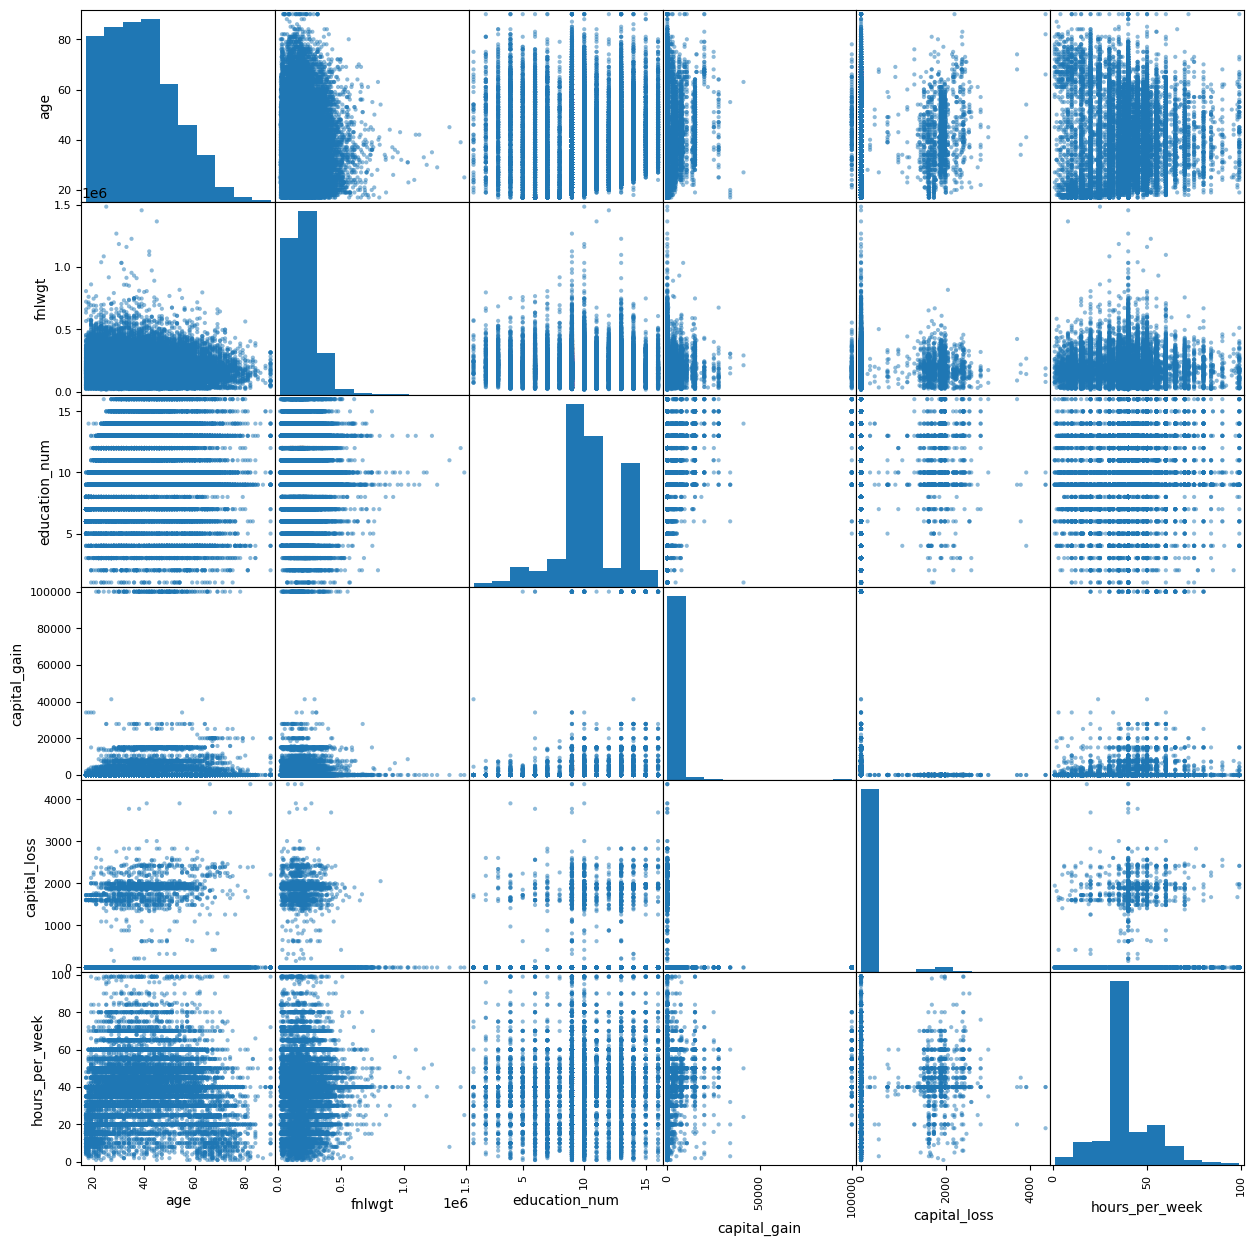

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(dt_sin_errores, figsize=(15,15))
plt.show()

### Analisis:
La gráfica analizada previamente revela la complejidad del problema, evidenciando una correlación deficiente entre las variables numéricas. Es notable la presencia de sesgos que podrían complicar significativamente la capacidad predictiva del modelo. Dentro de este panorama, se destacan como variables de particular importancia el nivel educativo (education_num) y la ganancia de capital (capital_gain), las cuales sugieren la posibilidad de adoptar un enfoque lineal para mejorar la eficiencia de las predicciones.

Para un analisis mas profundo se realizara una grafica de dispersion para ver como influyen estas dos graficas en la variable objetivo.

In [24]:
from sklearn.preprocessing import OrdinalEncoder

'''
Teniendo en cuenta que solo existen 2 categorias en la variable objetivo hacemos un Ordinal Encoder,
Esto con el fin de ayudar a visualizar la relacion entre el grupo de variables  y la variable objetivo.
'''
encoder = OrdinalEncoder()

# Hacemos una copia del dataset anterior para no cambiarlo en caso de errores
dt_relaciones = dt_sin_errores.copy()
dt_relaciones['income_category'] = encoder.fit_transform(dt_relaciones[['income']])

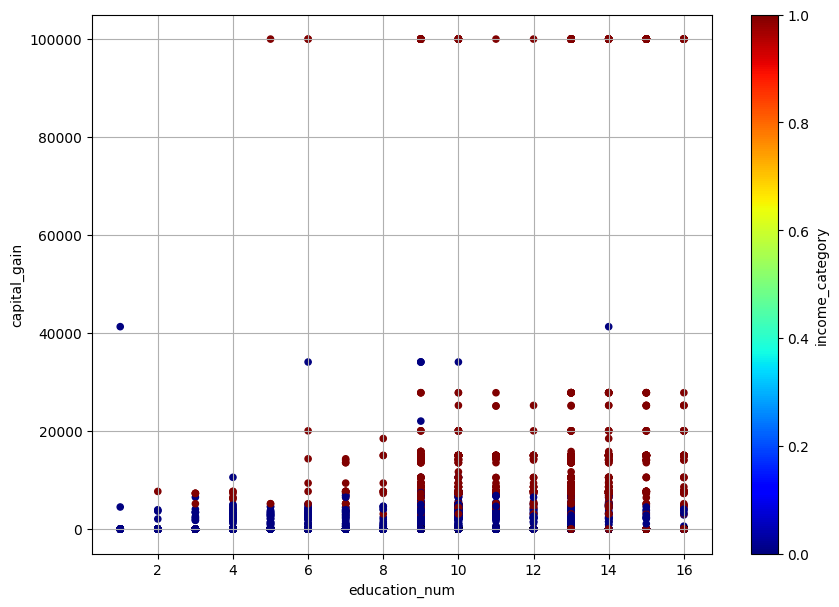

In [25]:
dt_relaciones.plot(kind = 'scatter', x = 'education_num', y = 'capital_gain', grid = True,
             c = 'income_category', cmap = 'jet', colorbar= True, figsize = (10,7))
plt.show()

La relación entre estas variables y la ganancia individual sugiere una posible correlación lineal; sin embargo, debido a ciertos sesgos, la predicción se basaría en la probabilidad de ocurrencia. Es observable que, a medida que aumenta el nivel de educación y el monto de ganancia de capital, también lo hace la posibilidad de incrementar los ingresos del individuo. Este fenómeno subraya la importancia de considerar factores como la educación y la inversión en capital como indicadores potenciales de éxito económico, aunque se debe tener en cuenta la variabilidad y las excepciones que pueden surgir debido a la naturaleza probabilística de estas relaciones.

## 4.2. Matriz de correlación:

<Axes: >

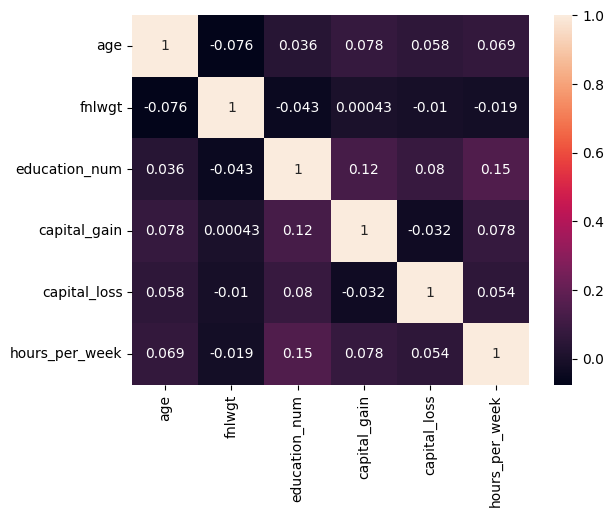

In [26]:
sns.heatmap(dt_relaciones.select_dtypes(include=['int64']).corr(),cbar=True, annot=True)


Se observa una correlación positiva en la mayoría de las variables, aunque todas presentan valores bajos, lo que sugiere dificultades en el entrenamiento del modelo. Como se evidenció en gráficas previas, la relación más destacada ocurre entre 'education_num' y 'capital_gain'. No obstante, se identifica una relación un poco mas fuerte entre 'education_num' y 'hours_per_week'.

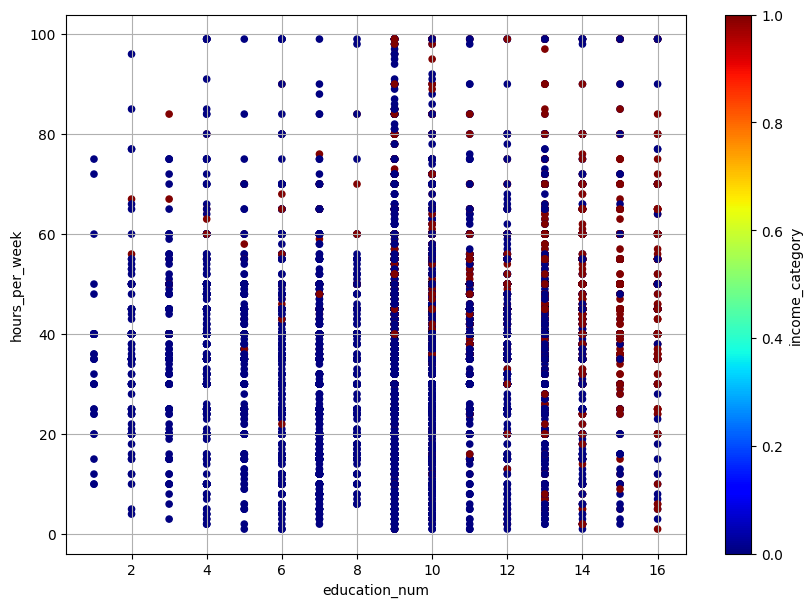

In [27]:
dt_relaciones.plot(kind = 'scatter', x = 'education_num', y = 'hours_per_week', grid = True,
             c = 'income_category', cmap = 'jet', colorbar= True, figsize = (10,7))
plt.show()

A pesar de que las variables 'education_num' y 'hours_per_week' tienen mejor relacion entre ellas demuestran mas inestabilidad a la hora de relacionarse con la variable objetivo.

__Analisis general sobre las correlaciones ante el modelo:__

De igual forma, es importante considerar que, aunque las correlaciones son bajas, esto no necesariamente implica que el modelo sea inadecuado. En contextos de datos complejos y multidimensionales, las relaciones lineales directas entre variables pueden no ser la norma. En estos casos, métodos de entrenamiento que capturan relaciones no lineales o interacciones entre variables podrían ser más efectivos.

## 4.3. Matriz de correlación con la variable objetivo

<Axes: >

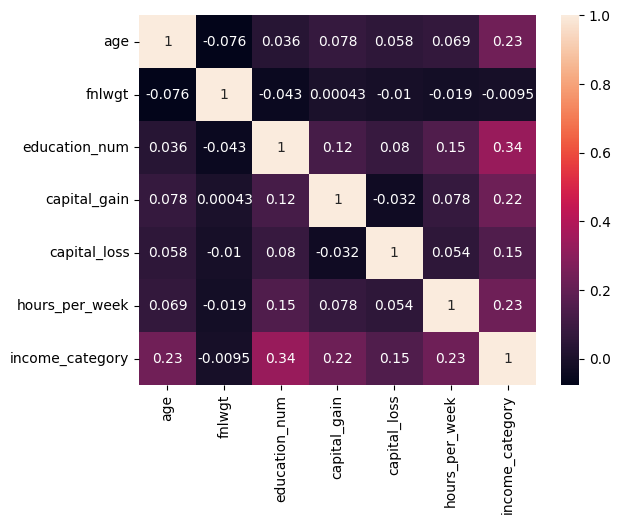

In [28]:
dt_relaciones['income_category'] = dt_relaciones['income_category'].astype('int64')

sns.heatmap(dt_relaciones.select_dtypes(include=['int64']).corr(),cbar=True, annot=True)

In [34]:
corr_matrix = dt_relaciones.corr(numeric_only=True)

corr_matrix['income_category'].sort_values(ascending=False)

income_category    1.000000
education_num      0.335272
age                0.234037
hours_per_week     0.229658
capital_gain       0.223336
capital_loss       0.150501
fnlwgt            -0.009502
Name: income_category, dtype: float64

Cada variable, de manera individual, presenta una correlación positiva con la variable objetivo, destacando especialmente la relación con 'education_num' como la más significativa. Tanto la matriz de distribución como la de correlación revelan indicios prometedores para utilizar 'education_num' en la predicción, convirtiéndola en la variable más relevante para optimizar el entrenamiento del modelo.

## 5. Analisis del preprocesamiento:

